In [1]:
from functions import read_csv_file, make_np_array
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
data, increment = read_csv_file("F_2_8_5b_NewFile4.csv")

In [3]:
ch1=make_np_array(data,0)*1000
ch2=make_np_array(data,1) *1000
ch3=make_np_array(data,2) *1000
times=make_np_array(data,3) *1000000

## Neural Network MLP

In [4]:
layer_list = []
for i in range(5):
    for j in range(5):
        layer_list.append((5*i, 5*j))

param_grid = {
'hidden_layer_sizes': layer_list,
'max_iter':[50, 100],
'activation':['identity','logistic','tanh','relu'],
'solver':['lbfgs','sgd','adam'],
'alpha':[0.0001,0.05],
'learning_rate':['constant','invscaling','adaptive']
}

In [5]:
def run_channel_mlp(x_data, y_data, name, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)
    for data in [X_train, X_test, y_train, y_test]:
        data = data.reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp_reg = MLPRegressor()

    grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    plt.plot(X_test, y_test, ".")
    plt.plot(X_test, y_pred, ".")
    plt.title(f"{name} with best params from grid")
    plt.show()
    print(grid.best_params_)

    print(f"R2 SCORE: {round(r2_score(y_test, y_pred),2)}")
    print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_pred), 2)}")

Używamy GridSearch w celu znalezienia najlepszych parametrów pod dany problem.

### CH1

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6480 fits failed out of a total of 18000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

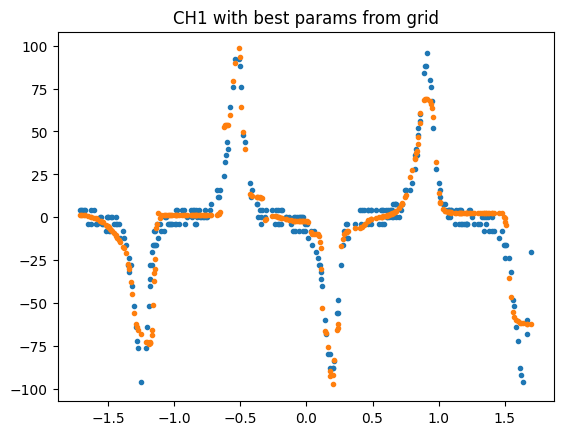

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
R2 SCORE: 0.89
Mean Squared Error: 104.63


In [6]:
run_channel_mlp(times, ch1, "CH1", param_grid)

### CH2

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6925 fits failed out of a total of 18000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

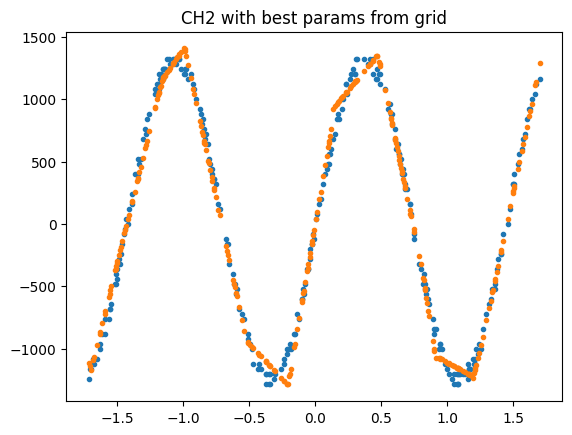

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
R2 SCORE: 0.99
Mean Squared Error: 8541.29


In [7]:
run_channel_mlp(times, ch2, "CH2", param_grid)

### CH3 

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6480 fits failed out of a total of 18000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

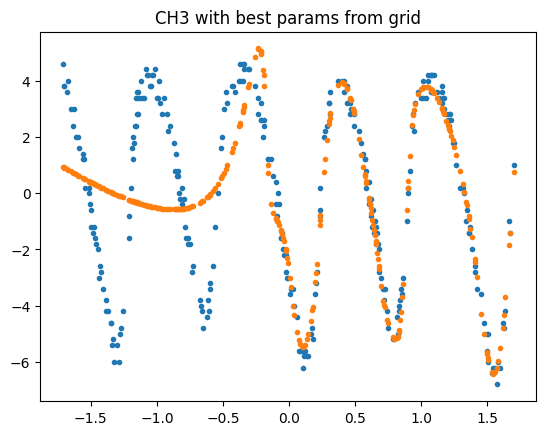

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'invscaling', 'max_iter': 100, 'solver': 'lbfgs'}
R2 SCORE: 0.63
Mean Squared Error: 3.99


In [8]:
run_channel_mlp(times, ch3, "CH3", param_grid)

## Support Vector Regression

In [9]:
param_grid = {
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0],
    'tol': [0.0001, 0.001, 0.01],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 0.2],
    'shrinking': [True, False]
}

param_grid = {
    'degree': [2, 3, 4, 5, 6],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0, 1.5, 2.0],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5],
    'shrinking': [True, False]
}

In [10]:
def run_channel_svr(x_data, y_data, name, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)
    for data in [X_train, X_test, y_train, y_test]:
        data = data.reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    svr_reg = SVR()

    grid = GridSearchCV(svr_reg, param_grid, n_jobs= -1, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    plt.plot(X_test, y_test, ".")
    plt.plot(X_test, y_pred, ".")
    plt.title(f"{name} with best params from grid")
    plt.show()
    print(grid.best_params_)

    print(f"R2 SCORE: {round(r2_score(y_test, y_pred),2)}")
    print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_pred), 2)}")

Używamy GridSearch w celu znalezienia najlepszych parametrów pod dany problem.

### CH1

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


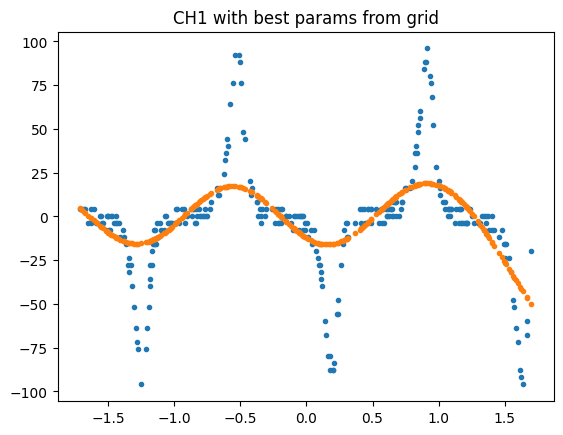

{'C': 100.0, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.5, 'gamma': 'auto', 'shrinking': True, 'tol': 0.01}
R2 SCORE: 0.47
Mean Squared Error: 516.86


In [11]:
run_channel_svr(times, ch1, "CH1", param_grid)

### CH2

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


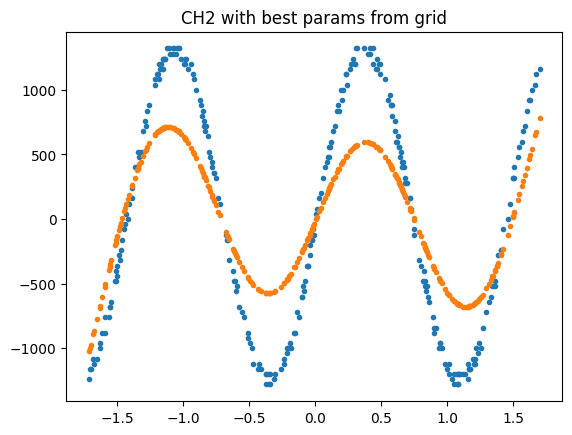

{'C': 100.0, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.5, 'gamma': 'scale', 'shrinking': True, 'tol': 0.01}
R2 SCORE: 0.76
Mean Squared Error: 182255.66


In [12]:
run_channel_svr(times, ch2, "CH2", param_grid)

### CH3

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


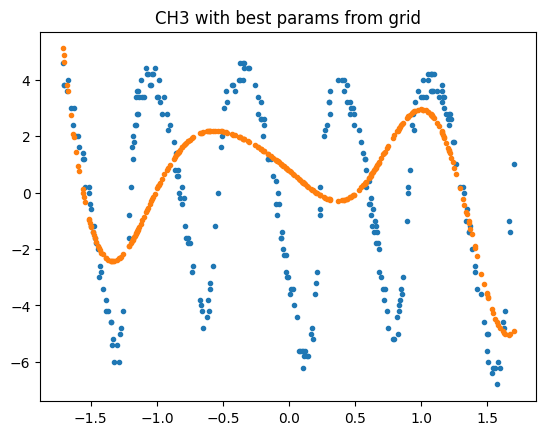

{'C': 100.0, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.5, 'gamma': 'scale', 'shrinking': True, 'tol': 0.1}
R2 SCORE: 0.11
Mean Squared Error: 9.6


In [13]:
run_channel_svr(times, ch3, "CH3", param_grid)